In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from sklearn.datasets import load_wine

In [59]:
wine = load_wine()

In [60]:
A = wine.data

In [61]:
n = wine.data.shape[0]
d = wine.data.shape[1]

In [62]:
y = 1.0*np.ones([A.shape[0],])

In [63]:
for i in range(wine.target.shape[0]):
  if wine.target[i] != 1:
    y[i] = -1

In [64]:
indexarr = np.arange(n)
np.random.shuffle(indexarr)
print(indexarr)

[ 82  85 102 143 144 129  65  10 149  15  19  63 161 125  35  45 163 115
 153  36  17  48  20  55 150  14 177 165  64  60 157  66  93  40  23  25
 172  86   3  44  83 131  22 162  91  30 103   4 121 127 111 159 145 109
 110  61  67  87 120  27 174 141 133  34 105 152  84  39 106  70  31  88
  26  74 137 116 176  76  96 113  62 148 136  56 122 114 101 160   6 128
  13  24  46 170  16  54  53  95 168 171 139  29 147  75 155 158 134  90
 146  71  52  92  21  80 167 175  98   9  99 124 173  97  33 154   5 123
  77 104  12   0  79   1  69  18 135  42 140  58 130 108 112  94   8  72
  73  57 164 117 169   2  38  28  81 107 119  47 166  89 132 151 118  43
  51  59  50  49   7  32  37  11  78 138  68 126  41 100 156 142]


In [65]:
train_data = np.ones([int(len(indexarr)*0.8),A.shape[1]])

In [66]:
for i in range(int(len(indexarr)*0.8)):
  train_data[i] = A[indexarr[i]]

In [67]:
test_data = np.ones([int(len(indexarr)*0.2),A.shape[1]])

for i in range(int(len(indexarr)*0.2)):
  test_data[i] = A[indexarr[i + int(len(indexarr)*0.8)]]

In [68]:
train_label = np.ones([int(len(indexarr)*0.8),])

In [69]:
for i in range(int(len(indexarr)*0.8)):
  train_label[i] = y[indexarr[i]]

In [70]:
test_label = np.ones([int(len(indexarr)*0.2),])

for i in range(int(len(indexarr)*0.2)):
  test_label[i] = y[indexarr[i + int(len(indexarr)*0.8)]]

In [71]:
def predict(w, x):
  if np.matmul(w.transpose(),x)<0:
    return -1
  else:
    return 1

In [72]:
def compute_accuracy(data, labels, model_w):
  no_correct = 0
  for i in range(len(labels)):
    if predict(model_w, data[i]) == labels[i]:
      no_correct += 1
  return no_correct/len(labels)

#3)

In [73]:
def compute_orthogonal_projection(z):
  sum = 0
  for i in z:
    sum += abs(i)
  k = (sum-1)/2
  arr = np.ones(len(z))
  for i in range(len(z)):
    if z[i] > k:
      arr[i] = z[i] - k
    elif z[i] < -k:
      arr[i] =  z[i] + k
    else:
      arr[i] =  0
  return arr

#4)

In [74]:
def compute_loss_h(w, x, y):
  return max(0, 1 - np.multiply(y,np.matmul(w.transpose(),x)))

In [75]:
def compute_objfn(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_h(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [76]:
def compute_grad_loss_h(x, y, model_w, l):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    if compute_loss_h(model_w, x, y) != 0:
      arr[i] = (l/n)*model_w[i] - y*x[i]
    else:
      arr[i] = (l/n)*model_w[i]
  return arr

In [77]:
def OPT1(data, label, l, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = compute_orthogonal_projection(w - np.multiply(step, compute_grad_loss_h(data[i], label[i], w, l)))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfn(data, label, w, l))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [78]:
num_epochs = 500
lambda_set = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,501)]
obj_fnval_list = []
train_accuracy  = []
test_accuracy  = []
test_accuracy_2  = []
train_accuracy_2 = []

for i in lambda_set:
  model_w, acc_test, acc_train, obj_fnval = OPT1(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  train_accuracy .append(acc_train)
  test_accuracy .append(acc_test)
  test_accuracy_2.append(compute_accuracy(test_data, test_label, model_w))
  train_accuracy_2.append(compute_accuracy(train_data, train_label, model_w))

# Plot of objective function values for different values of lambda

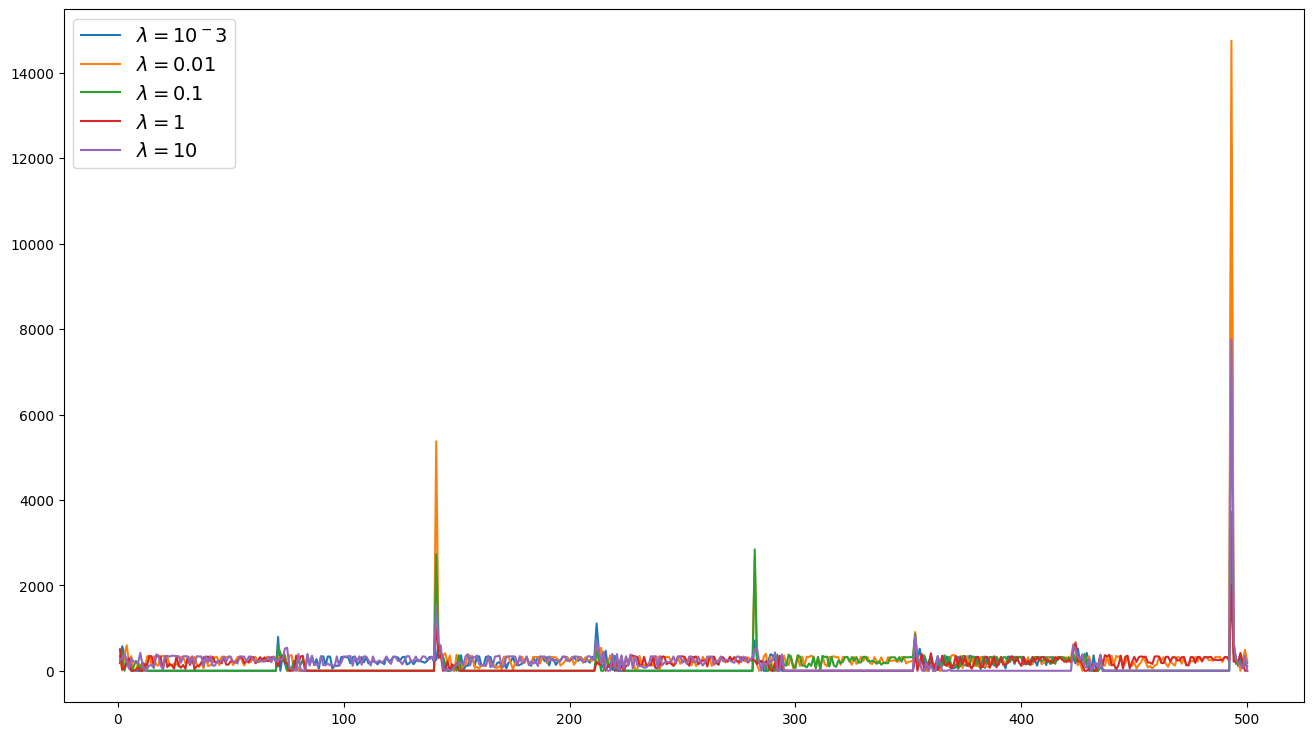

In [79]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lambda_set[i]))
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)
plt.show()

#Plot of test set accuracy values for different values of lambda

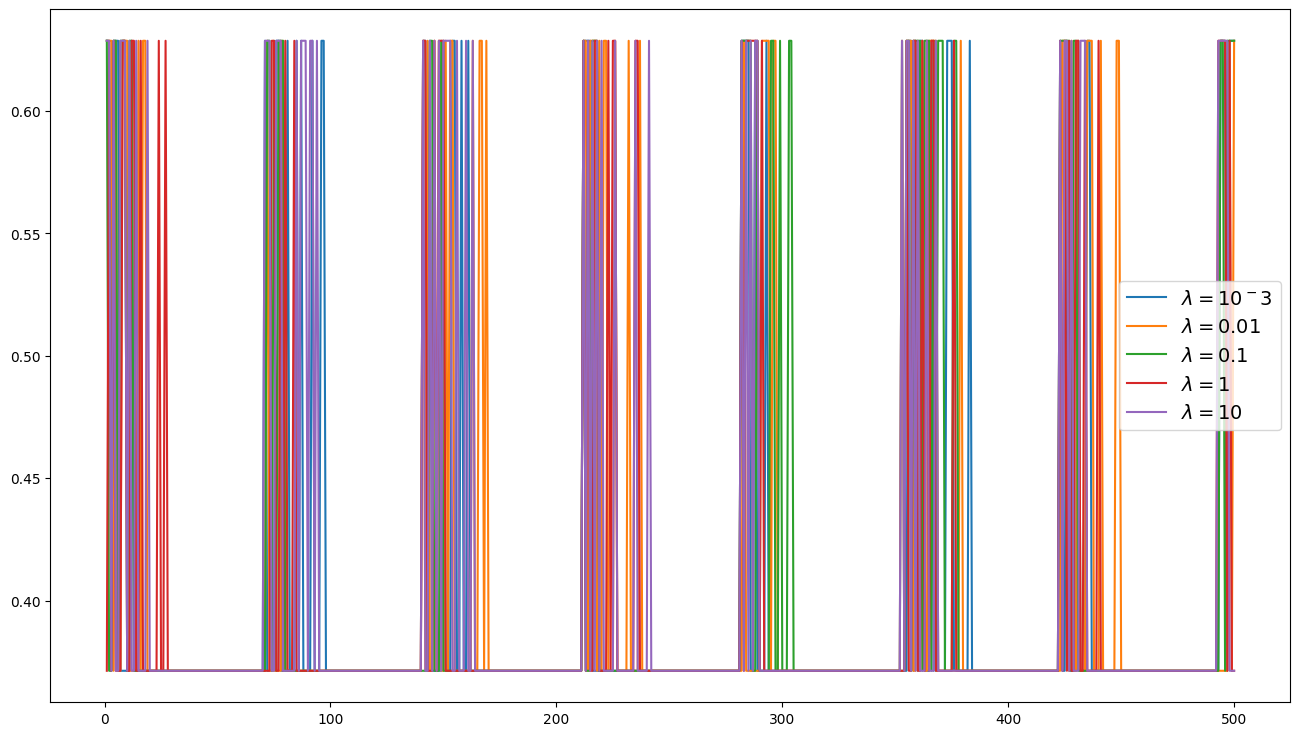

In [80]:
plt.figure(figsize = (16,9))
for i in range(len(test_accuracy)):
  plt.plot(x_epochs, test_accuracy[i], label = 'lambda '+str(lambda_set[i]))
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)
plt.show()

#Plot of train set accuracy values for different values of lambda

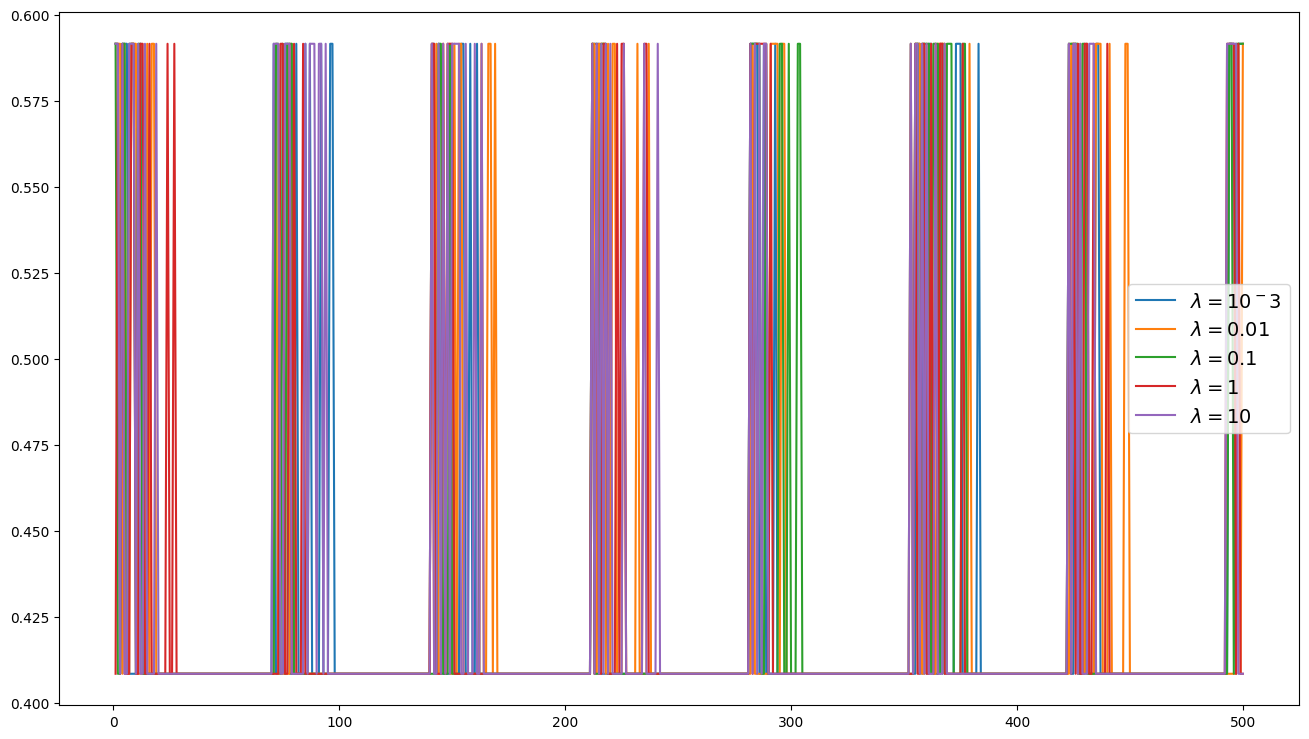

In [81]:
plt.figure(figsize = (16,9))
for i in range(len(train_accuracy)):
  plt.plot(x_epochs, train_accuracy[i], label = 'lambda '+str(lambda_set[i]))
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)
plt.show()

In [82]:
data = {'Lambda':lambda_set,'Test set accuracy':test_accuracy_2,'Train set accuracy':train_accuracy_2}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])

In [83]:
df

Lambda  Test set accuracy  Train set accuracy
0   0.001           0.628571            0.591549
1   0.010           0.628571            0.591549
2   0.100           0.628571            0.591549
3   1.000           0.371429            0.408451
4  10.000           0.371429            0.408451



We can see that the curves for all values of lambda are very squiggly in nature and increases rapidly for the largest epoch i.e. 500th. We can see that for lamda = 0.1, 1, 10 we get higher accuracy value. We can also see that the test accuracy is greater than train accuracy in some cases.

One more observation that has been made is the accuracy changes with every random split of data.

#Loss Function, $L_l$

In [84]:
def compute_loss_l(w, x, y):
  return np.log(1 + np.exp(np.multiply(-y, np.matmul(w.transpose(), x))))

In [85]:
def compute_objfn(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_l(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [86]:
def compute_grad_loss_l(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    arr[i] = (lamda/n)*model_w[i] + np.divide((np.multiply((np.exp(np.multiply(-y,np.matmul(model_w,x)))),np.multiply(-y,x[i]))), 1 + (np.exp(np.multiply(-y,np.matmul(model_w,x)))))
  return arr

In [87]:
def OPT2(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = w - np.multiply(step, compute_grad_loss_l(data[i], label[i], w, lamda))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfn(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [88]:
num_epochs = 500
lamdas = [1e-3,1e-2,0.1,1,10]
x_epochs = [i for i in range(1,501)]
obj_fnval_list = []
train_accuracy  = []
test_accuracy  = []
test_accuracy_2 = []
train_accuracy_2 = []

for i in lamdas:
  model_w, acc_test, acc_train, obj_fnval = OPT2(train_data, train_label, i, num_epochs)
  obj_fnval_list.append(obj_fnval)
  train_accuracy .append(acc_train)
  test_accuracy .append(acc_test)
  test_accuracy_2.append(compute_accuracy(test_data, test_label, model_w))
  train_accuracy_2.append(compute_accuracy(train_data, train_label, model_w))

<ipython-input-86-b0b0279a90fc>:5: RuntimeWarning: overflow encountered in exp
  arr[i] = (lamda/n)*model_w[i] + np.divide((np.multiply((np.exp(np.multiply(-y,np.matmul(model_w,x)))),np.multiply(-y,x[i]))), 1 + (np.exp(np.multiply(-y,np.matmul(model_w,x)))))
<ipython-input-86-b0b0279a90fc>:5: RuntimeWarning: invalid value encountered in divide
  arr[i] = (lamda/n)*model_w[i] + np.divide((np.multiply((np.exp(np.multiply(-y,np.matmul(model_w,x)))),np.multiply(-y,x[i]))), 1 + (np.exp(np.multiply(-y,np.matmul(model_w,x)))))


#5)

We get an increasing function of the loss hence we get an error of overflow, so logistic function cannot be applied in this case.

#Loss Function $L_{sh}$

In [89]:
def compute_loss_sh(w, x, y):
  return (max(0, 1 - np.multiply(y, np.matmul(w.transpose(), x)))**2)

In [90]:
def compute_objfn(data, labels, model_w, lamda):
  sum = 0
  for i in range(len(labels)):
    sum += compute_loss_sh(model_w, data[i], labels[i])
  sum = sum/len(labels)
  sum += (lamda/2)*(np.linalg.norm(model_w))**2
  return sum

In [91]:
def compute_grad_loss_sh(x, y, model_w, lamda):
  n = len(model_w)
  arr = np.ones(n)
  for i in range(n):
    if compute_loss_sh(model_w, x, y) != 0:
      arr[i] = (lamda/n)*model_w[i] + np.multiply(-2*y*x[i],max(0, 1 - np.multiply(y, np.matmul(model_w.transpose(), x))))
    else:
      arr[i] = (lamda/n)*model_w[i]
  return arr

In [92]:
def OPT3(data, label, lamda, num_epochs):
  t = 1
  obj_fn = []
  accuracy_test = []
  accuracy_train = []
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w = compute_orthogonal_projection(w - np.multiply(step, compute_grad_loss_sh(data[i], label[i], w, lamda)))
      t = t + 1
      if t > 1e4:
        t = 1
    obj_fn.append(compute_objfn(data, label, w, lamda))
    accuracy_test.append(compute_accuracy(test_data, test_label, w))
    accuracy_train.append(compute_accuracy(train_data, train_label, w))
  return w, accuracy_test, accuracy_train, obj_fn

In [93]:
num_epochs = 500
lambda_set = [1e-3,1e-2,0.1,1,10]
x_epochs = [l for l in range(1,501)]
obj_fnval_list = []
train_accuracy = []
test_accuracy = []
test_accuracy_2 = []
train_accuracy_2 = []

for l in lambda_set:
  model_w, acc_test, acc_train, obj_fn = OPT3(train_data, train_label, l, num_epochs)
  obj_fnval_list.append(obj_fn)
  train_accuracy.append(acc_train)
  test_accuracy.append(acc_test)
  test_accuracy_2.append(compute_accuracy(test_data, test_label, model_w))
  train_accuracy_2.append(compute_accuracy(train_data, train_label, model_w))

<ipython-input-89-bc75d84a8d4e>:2: RuntimeWarning: overflow encountered in scalar power
  return (max(0, 1 - np.multiply(y, np.matmul(w.transpose(), x)))**2)
<ipython-input-91-fd055830008d>:6: RuntimeWarning: overflow encountered in multiply
  arr[i] = (lamda/n)*model_w[i] + np.multiply(-2*y*x[i],max(0, 1 - np.multiply(y, np.matmul(model_w.transpose(), x))))
<ipython-input-89-bc75d84a8d4e>:2: RuntimeWarning: overflow encountered in matmul
  return (max(0, 1 - np.multiply(y, np.matmul(w.transpose(), x)))**2)
<ipython-input-90-8f91bbffb773>:4: RuntimeWarning: overflow encountered in scalar add
  sum += compute_loss_sh(model_w, data[i], labels[i])
<ipython-input-91-fd055830008d>:6: RuntimeWarning: overflow encountered in matmul
  arr[i] = (lamda/n)*model_w[i] + np.multiply(-2*y*x[i],max(0, 1 - np.multiply(y, np.matmul(model_w.transpose(), x))))
<ipython-input-90-8f91bbffb773>:6: RuntimeWarning: overflow encountered in scalar multiply
  sum += (lamda/2)*(np.linalg.norm(model_w))**2


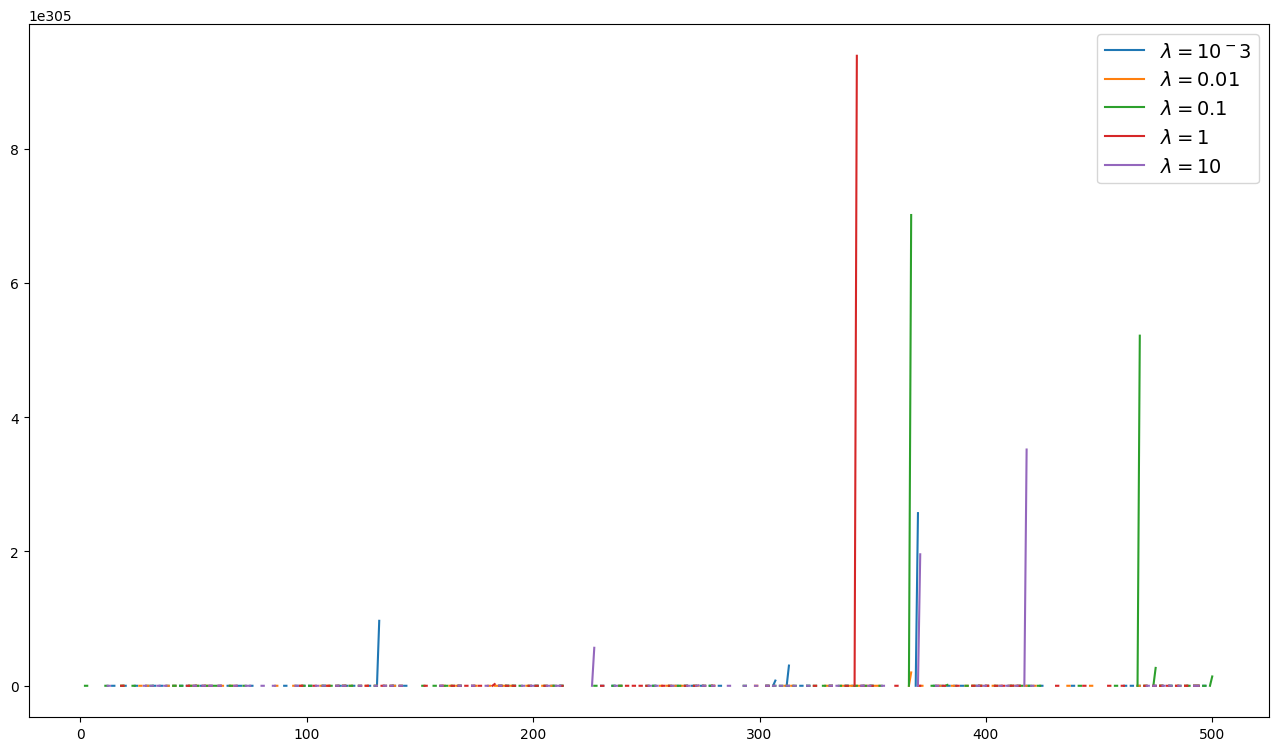

In [94]:
plt.figure(figsize = (16,9))
for i in range(len(obj_fnval_list)):
  plt.plot(x_epochs, obj_fnval_list[i], label = 'lambda '+str(lambda_set[i]))
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)
plt.show()

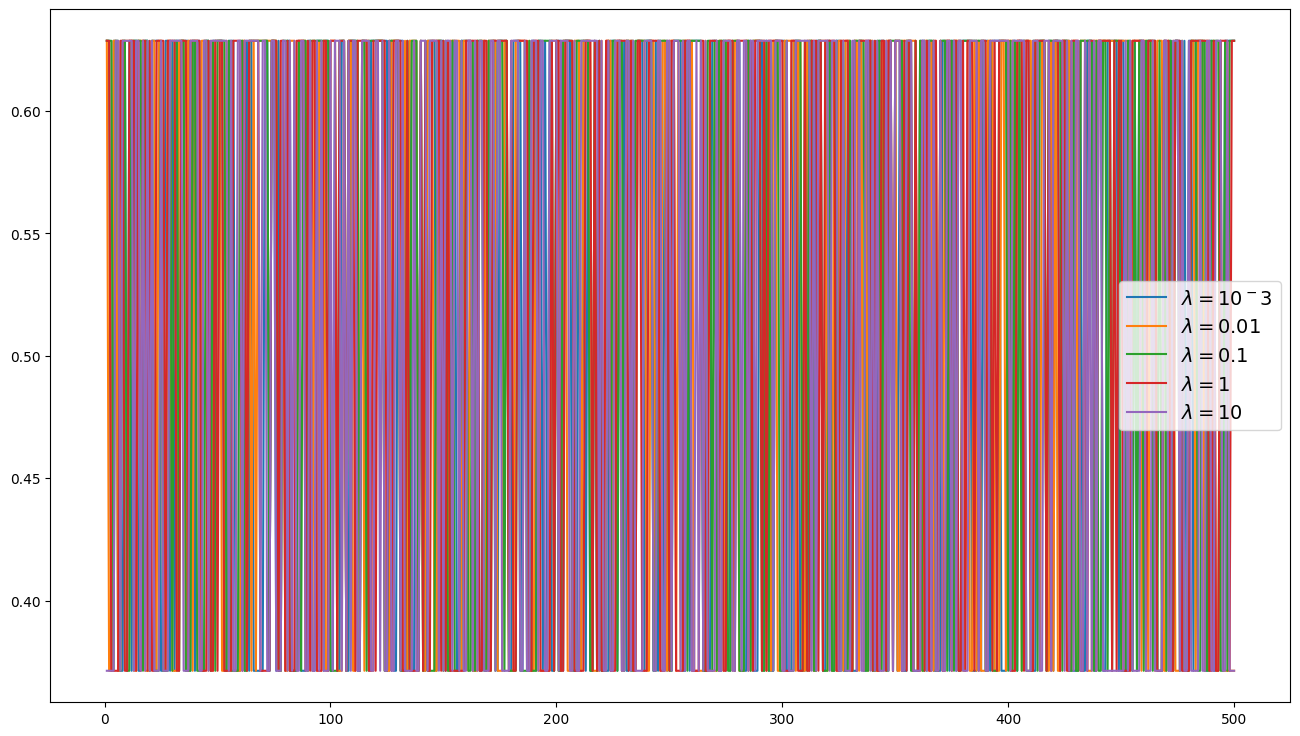

In [95]:
plt.figure(figsize = (16,9))
for i in range(len(test_accuracy)):
  plt.plot(x_epochs, test_accuracy[i], label = 'lambda '+str(lambda_set[i]))
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)
plt.show()

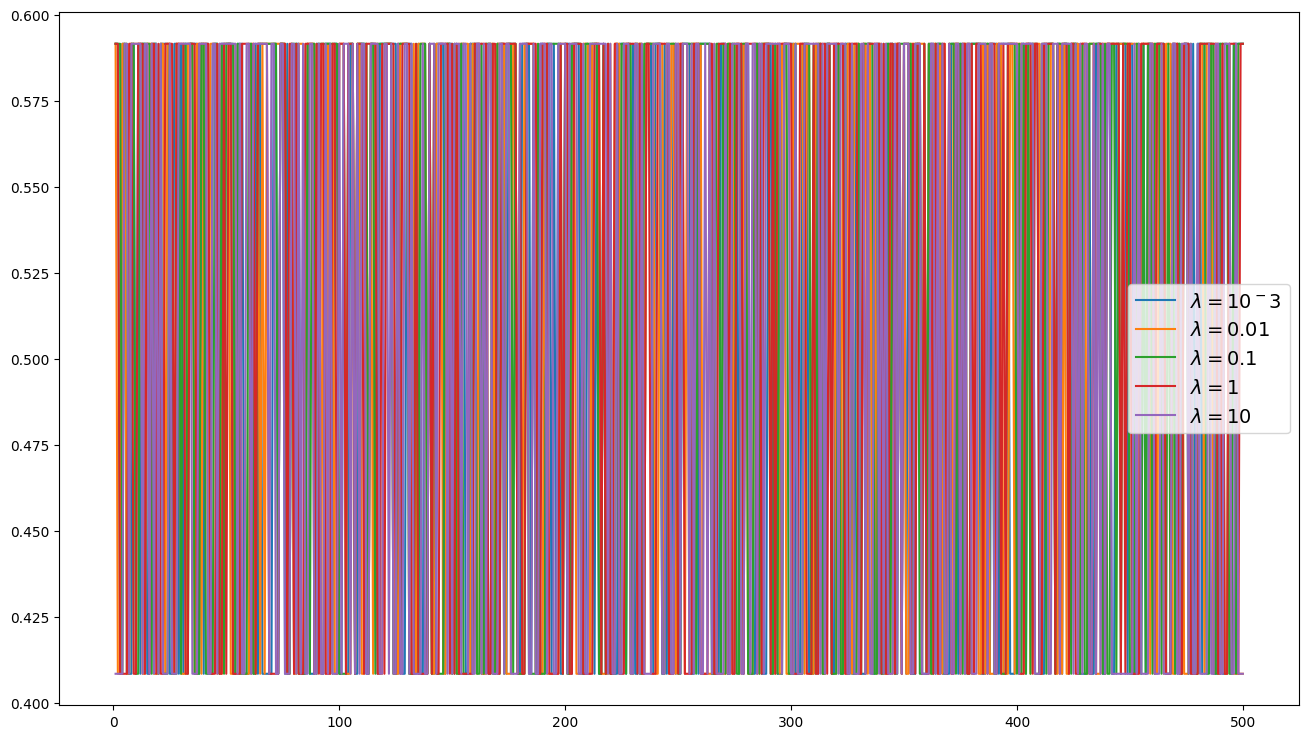

In [96]:
plt.figure(figsize = (16,9))
for i in range(len(train_accuracy)):
  plt.plot(x_epochs, train_accuracy[i], label = 'lambda '+str(lambda_set[i]))
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)
plt.show()

In [97]:
data = {'Lambda':lambda_set,'Test set accuracy':test_accuracy_2,'Train set accuracy':train_accuracy_2}
df = pd.DataFrame (data, columns = ['Lambda','Test set accuracy','Train set accuracy'])

In [98]:
df

Lambda  Test set accuracy  Train set accuracy
0   0.001           0.628571            0.591549
1   0.010           0.371429            0.408451
2   0.100           0.628571            0.591549
3   1.000           0.628571            0.591549
4  10.000           0.371429            0.408451



We can see that the objective function value curve rises for some lamdas at some epochs.

We can see that the accuracy curves for all values of lambda lie within a range. We can see that the test accuracy is greater than train accuracy in some cases.

One more observation that has been made is the accuracy changes with every random split of data.